This is a notebook to demonstrate different optimisation algorithms and compare their working

We have shown how each algorithm converges to the global minima to get the best possible results, and how many epochs it takes for each to converge till there. <br>
We have also created videos that show the change in the weights and bias terms to visualise easily how the algorithms change the weights to optimise their operations and algorithms

We have used sigmoid neurons to perform the algorithms 

# Packages

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np

# Data

In [0]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

In [0]:
w_init = 2.1
b_init = 4.0

In [0]:
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 200
animation_frames = 20

# Class & Functions

In [0]:
class SigmoidNeuron_Compressed :
    def __init__ (self, w=0, b=0) : self.W, self.B, self.W_updates, self.B_updates, self.err_updates = w, b, [], [], []
    def grad_w (self, x, y, w=None, b=None) : return ((1.0/(1.0+np.exp(-(self.W*x+self.B))))-y)*(1.0/(1.0+np.exp(-(self.W*x+self.B))))*(1-(1.0/(1.0+np.exp(-(self.W*x+self.B)))))*x if w is None else ((1.0/(1.0+np.exp(-(w*x+b))))-y)*(1.0/(1.0+np.exp(-(w*x+b))))*(1-(1.0/(1.0+np.exp(-(w*x+b)))))*x
    def grad_b (self, x, y, w=None, b=None) : return ((1.0/(1.0+np.exp(-(self.W*x+self.B))))-y)*(1.0/(1.0+np.exp(-(self.W*x+self.B))))*(1-(1.0/(1.0+np.exp(-(self.W*x+self.B))))) if w is None else ((1.0/(1.0+np.exp(-(w*x+b))))-y)*(1.0/(1.0+np.exp(-(w*x+b))))*(1-(1.0/(1.0+np.exp(-(w*x+b)))))
    def append_log (self, w, b, err) : self.W_updates.append(w), self.B_updates.append(b), self.err_updates.append(err) 
    def error (self, X, Y, w=None, b=None) : 
        total_error = 0 
        for x, y in zip(X,Y) : total_error = total_error+0.5*((1.0/(1.0+np.exp(-(self.W*x+self.B))))-y)**2 if w is None else total_error+0.5*((1.0/(1.0+np.exp(-(w*x+b))))-y)**2
        return total_error  
    def fit(self,X_train,Y_train,optimiser,epochs=1,learning_rate=1,momentum=0.75,beta=0.9,print_error=False):
        self.W_updates,self.B_updates,self.err_updates,new_LR=[],[],[],learning_rate/X_train.shape[0]
        if optimiser.lower()=='gd' or optimiser.lower()=='gradientdescent' or optimiser.lower()=='gradient descent':
            for epoch in range(epochs):
                dw,db=0,0
                for x,y in zip(X_train,Y_train):dw,db=dw+self.grad_w(x,y),db+self.grad_b(x,y)
                self.W,self.B=self.W-dw*new_LR,self.B-db*new_LR
                self.append_log(self.W, self.B, self.error(X_train,Y_train))       
        elif optimiser.lower()=='momentum' or optimiser.lower()=='momentum based gradient descent' or optimiser.lower()=='mgd' :
            W_hist, B_hist = 0, 0
            for epoch in range(epochs) :
                dw,db=0,0
                for x,y in zip(X_train,Y_train):dw,db=dw+self.grad_w(x,y),db+self.grad_b(x,y)
                W_hist,B_hist=momentum*W_hist+dw*new_LR,momentum*B_hist+db*new_LR 
                self.W,self.B=self.W-W_hist,self.B-B_hist
                self.append_log(self.W,self.B,self.error(X_train,Y_train))
        elif optimiser.lower()=='nag' or optimiser.lower()=='nesterov accelerated gradient descent' :
            W_hist, B_hist = 0, 0
            for epoch in range(epochs) :
                dw, db, W_hist, B_hist = 0, 0, W_hist * momentum, B_hist * momentum
                for x,y in zip(X_train,Y_train):dw,db=dw+self.grad_w(x,y,self.W-W_hist,self.B-B_hist),db+self.grad_b(x,y,self.W-W_hist,self.B-B_hist)
                W_hist,B_hist=W_hist+new_LR*dw,B_hist+new_LR*db
                self.W,self.B=self.W-W_hist,self.B-B_hist 
                self.append_log(self.W, self.B, self.error(X_train,Y_train))
        elif optimiser.lower()=='adagrad' or optimiser.lower()=='adaptive gradient' :
            eps, W_hist, B_hist = 1e-8, 0, 0
            for epoch in range(epochs) :
                dw, db = 0, 0
                for x,y in zip(X_train,Y_train):dw,db=dw+self.grad_w(x,y),db+self.grad_b(x,y)
                W_hist,B_hist=W_hist+dw**2,B_hist+db**2
                self.W,self.B=self.W-dw*new_LR/(np.sqrt(W_hist)+eps),self.B-db*new_LR/(np.sqrt(B_hist)+eps)
                self.append_log(self.W,self.B,self.error(X_train,Y_train))           
        elif optimiser.lower()=='rmsprop' or optimiser.lower()=='root mean squared propogation' :
            eps,W_hist,B_hist=1e-8,0,0
            for epoch in range(epochs) :
                dw,db=0,0
                for x,y in zip(X_train,Y_train):dw,db=dw+self.grad_w(x,y),db+self.grad_b(x,y)
                W_hist,B_hist=beta*W_hist+(1-beta)*(dw**2),beta*B_hist+(1-beta)*(db**2)
                self.W,self.B=self.W-(learning_rate/np.sqrt(W_hist)+eps)*dw/X_train.shape[0],self.B-(learning_rate/np.sqrt(B_hist)+eps)*db/X_train.shape[0]
                self.append_log(self.W,self.B,self.error(X_train,Y_train))
        elif optimiser.lower()=='adam' or optimiser.lower()=='adaptive moment estimation' :
            eps,W_hist,B_hist,mmtm_W,mmtm_B,num_updates=1e-8,0,0,0,0,0
            for epoch in range(epochs) :
                dw,db,num_updates=0,0,num_updates+1
                for x,y in zip(X_train,Y_train):dw,db=dw+self.grad_w(x,y),db+self.grad_b(x,y)
                W_hist,B_hist,mmtm_W,mmtm_B=beta*W_hist+(1-beta)*dw**2,beta*B_hist+(1-beta)*db**2,momentum*mmtm_W+(1-momentum)*dw,momentum*mmtm_B+(1-momentum)*db
                self.W,self.B=self.W-(learning_rate/np.sqrt(W_hist/(1-np.power(beta,num_updates)))+eps)*(mmtm_W/(1-np.power(momentum,num_updates)))/X_train.shape[0],self.B-(learning_rate/np.sqrt(B_hist/(1-np.power(beta,num_updates)))+eps)*(mmtm_B/(1-np.power(momentum,num_updates)))/X_train.shape[0] 
                self.append_log(self.W,self.B,self.error(X_train,Y_train))
        else:print('Incorrect optimiser')
        if print_error:print('Final Error : ',self.err_updates[-1])

In [0]:
def plot_animate_2d_comp(i):
    i = int(i*(epochs/animation_frames))
    line.set_data(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1])
    title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn_comp.err_updates[i]))
    return line, title
def plot_animate_3d_comp(i):
    i = int(i*(epochs/animation_frames))
    line1.set_data(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1])
    line1.set_3d_properties(sn_comp.err_updates[:i+1])
    line2.set_data(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1])
    line2.set_3d_properties(np.zeros(i+1) - 1)
    title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn_comp.err_updates[i]))
    return line1, line2, title

# Running Models

### GD - Vanila Gradient Descent

In [7]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='GD', epochs=200, learning_rate=5, print_error=True)

Final Error :  0.06974393370518009


### Momentum - Momentum based Gradient Descent

In [8]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='Momentum', epochs=200, learning_rate=5, momentum=0.9, print_error=True)

Final Error :  0.06974393464519019


### NAG - Nestrov Accelerated Gradient Descent

In [9]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='NAG', epochs=200, learning_rate=5, momentum=0.9, print_error=True)

Final Error :  0.07032548173723988


### AdaGrad - Adaptive Gradient

In [10]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='AdaGrad', epochs=200, learning_rate=5, print_error=True)

Final Error :  0.06974393370518009


### RMSProp - Root Mean Squared Propogation

In [11]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='RMSProp', epochs=200, learning_rate=5, beta=0.9, print_error=True)

Final Error :  0.11387588554033262


### Adam - Adaptive Moment Estimation

In [12]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='Adam', epochs=200, learning_rate=5, momentum=0.9, beta=0.9, print_error=True)

Final Error :  0.06990119764419696


# Plotting

## GD

### Running the Model

In [13]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='GD', epochs=200, learning_rate=5, print_error=True)

Final Error :  0.06974393370518009


### Plotting the Weights, Bias and Error Values

Error   -> Red 
Weights -> Blue 
Bias    -> Green


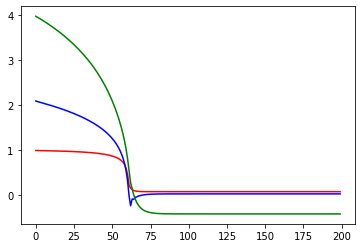

In [14]:
plt.plot(sn_comp.err_updates, 'r')
plt.plot(sn_comp.W_updates, 'b')
plt.plot(sn_comp.B_updates, 'g')
print ('Error   -> Red \nWeights -> Blue \nBias    -> Green')
plt.show()

This is a graph to show how the values of weights and bias change over 200 epochs

As we see, after 75th epoch, we have no change. It takes 75 epochs for vanila gradient descent to reach the least error 

### Visualising the change of Weights and Bias on 2D plane

**Setting the error surface**

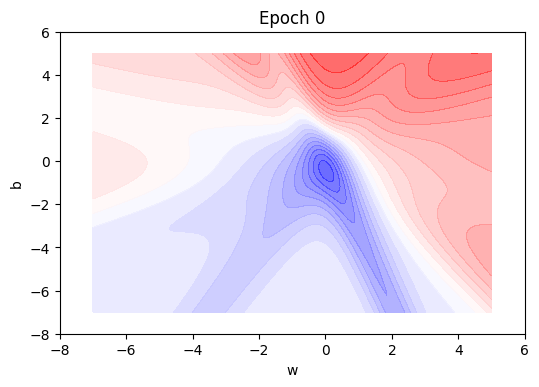

In [15]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)
fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

This is the error surface for this dataset. The red regions represent high loss and blue surface represents low loss <br>
This shows the error of the model when the values of W and b are the respective point on the graph <br>
The value of w = 0.2 and b = -0.5 will have least error in this dataset

**Visualising the way weights and bias are updated**

In [16]:
i = 0
line, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

This is a visualisation of how the vanila gradient descent algorithm works <br><br>
Points to note - <br>
1) It takes **60** epochs to reach the blue region (i.e. region with low loss) <br>
2) By 80th epoch (actually 75, discussed above) it has reached the least possible error and stabilises on that with no further changes/fluctuations

### Visualising the change of Weights and Bias on 3D plane

**Setting the Error Surface**

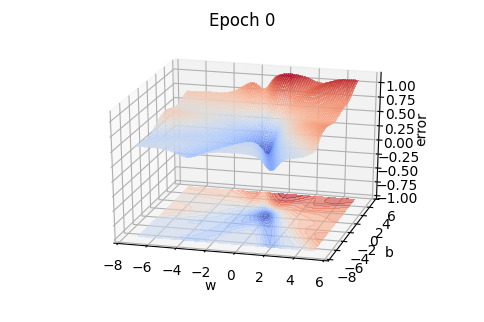

In [17]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
ax.set_zlabel('error')
ax.set_zlim(-1, np.max(Z))
Azim = -75 #@param {type: "slider", min: -90, max: 90}
Elev = 25 #@param {type: "slider", min: 0, max: 90}
ax.view_init (elev=Elev, azim=Azim) # azim = -20
ax.dist=12  
title = ax.set_title('Epoch 0')

As we can see the error surface in 3D, the higher regions are the areas with high error/loss and are red in colour, whereas the lower regions are the regions with lower error/loss and are blue in colour

**Visualising the way weights and bias are updated**

In [18]:
i = 0
line1, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], sn_comp.err_updates[:i+1], color='black', marker='.')
line2, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], np.zeros(i+1) - 1, color='black', marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_3d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

## Momentum

### Running the Model

In [19]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='Momentum', epochs=200, learning_rate=5, momentum=0.9, print_error=True)

Final Error :  0.06974393464519019


### Plotting the Weights, Bias and Error Values

Error   -> Red 
Weights -> Blue 
Bias    -> Green


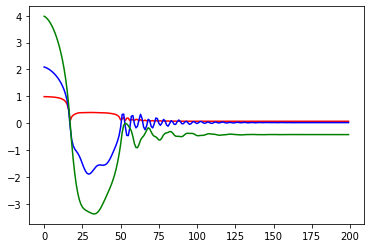

In [20]:
plt.plot(sn_comp.err_updates, 'r')
plt.plot(sn_comp.W_updates, 'b')
plt.plot(sn_comp.B_updates, 'g')
print ('Error   -> Red \nWeights -> Blue \nBias    -> Green')
plt.show()

This is a graph to show how the values of weights and bias change over 200 epochs

As we see, after 100th epoch, we have very less change. It takes 100 epochs for momentum based gradient descent to reach the least error <br>
There are fluctuations because of momentum and so it causes the extra change in weights and bias terms even if has reached optimal values

### Visualising the change of Weights and Bias on 2D plane

**Setting the error surface**

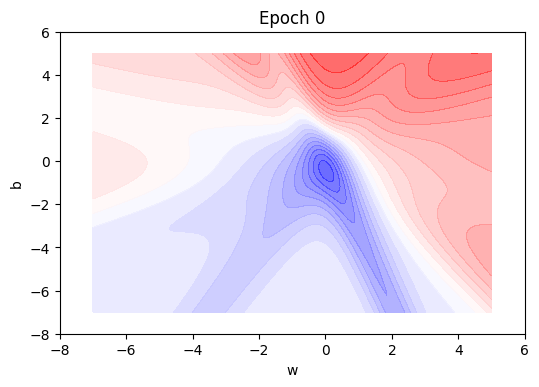

In [21]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)
fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

This is the error surface for this dataset. The red regions represent high loss and blue surface represents low loss <br>
This shows the error of the model when the values of W and b are the respective point on the graph <br>
The value of w = 0.2 and b = -0.5 will have least error in this dataset

**Visualising the way weights and bias are updated**

In [22]:
i = 0
line, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

This is a visualisation of how the momentume based gradient descent algorithm works <br><br>

Points to note - <br>
1) It takes **15** epochs to reach the blue region (i.e. region with low loss) <br>
2) By 30th epoch, it overshoots too much, and this is where error is again high <br>
3) It again reaches back to the optimal minima by 60th epoch, but has lots of fluctuations due to momentum <br>
4) The least error is achieved at about 120th epoch and it stays that way afterwards. Least error was achieved earlier, but it again increased <br><br>

This takes longer to converge as compared to vanila gradient descent, but the change is faster in the flat regions, where the change in weights and bias terms will be low for vanila gradient descent

### Visualising the change of Weights and Bias on 3D plane

**Setting the Error Surface**

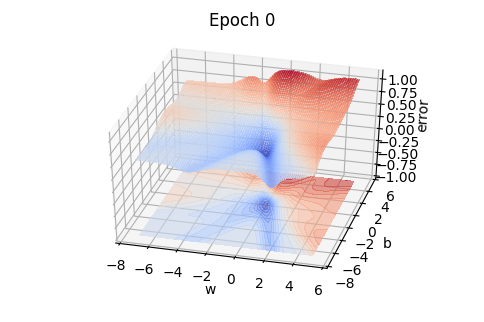

In [23]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
ax.set_zlabel('error')
ax.set_zlim(-1, np.max(Z))
Azim = -75 #@param {type: "slider", min: -90, max: 90}
Elev = 40 #@param {type: "slider", min: 0, max: 90}
ax.view_init (elev=Elev, azim=Azim) # azim = -20
ax.dist=12  
title = ax.set_title('Epoch 0')

As we can see the error surface in 3D, the higher regions are the areas with high error/loss and are red in colour, whereas the lower regions are the regions with lower error/loss and are blue in colour

**Visualising the way weights and bias are updated**

In [24]:
i = 0
line1, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], sn_comp.err_updates[:i+1], color='black', marker='.')
line2, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], np.zeros(i+1) - 1, color='black', marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_3d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

## NAG

### Running the Model

In [25]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='NAG', epochs=200, learning_rate=5, momentum=0.9, print_error=True)

Final Error :  0.07032548173723988


### Plotting the Weights, Bias and Error Values

Error   -> Red 
Weights -> Blue 
Bias    -> Green


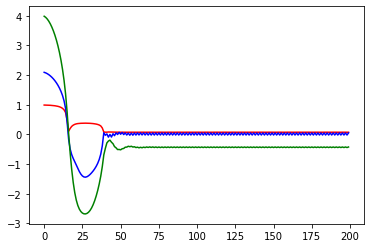

In [26]:
plt.plot(sn_comp.err_updates, 'r')
plt.plot(sn_comp.W_updates, 'b')
plt.plot(sn_comp.B_updates, 'g')
print ('Error   -> Red \nWeights -> Blue \nBias    -> Green')
plt.show()

This is a graph to show how the values of weights and bias change over 200 epochs

As we see, after 55th epoch, we have no change. It takes 55 epochs for nestrov accelerated gradient descent to reach a stable error

### Visualising the change of Weights and Bias on 2D plane

**Setting the error surface**

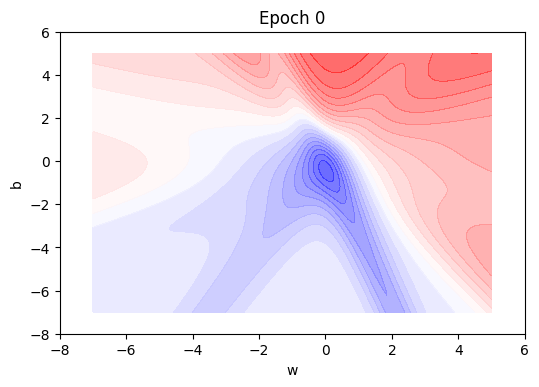

In [27]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)
fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

This is the error surface for this dataset. The red regions represent high loss and blue surface represents low loss <br>
This shows the error of the model when the values of W and b are the respective point on the graph <br>
The value of w = 0.2 and b = -0.5 will have least error in this dataset

**Visualising the way weights and bias are updated**

In [28]:
i = 0
line, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

This is a visualisation of how the nestrov accelerated gradient descent algorithm works <br><br>
Points to note - <br>
1) It takes **15** epochs to reach the blue region (i.e. region with low loss) <br>
2) By 30th epoch, it has overshot, but little as compared to momentum based gradient descent <br>
3) By 40th epoch, it reaches the lower loss regions again <br>
4) By 60th epoch (actually 55), it reaches a stable low loss/error

### Visualising the change of Weights and Bias on 3D plane

**Setting the Error Surface**

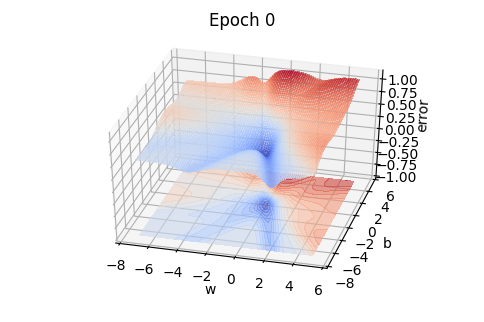

In [29]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
ax.set_zlabel('error')
ax.set_zlim(-1, np.max(Z))
Azim = -75 #@param {type: "slider", min: -90, max: 90}
Elev = 40 #@param {type: "slider", min: 0, max: 90}
ax.view_init (elev=Elev, azim=Azim) # azim = -20
ax.dist=12  
title = ax.set_title('Epoch 0')

As we can see the error surface in 3D, the higher regions are the areas with high error/loss and are red in colour, whereas the lower regions are the regions with lower error/loss and are blue in colour

**Visualising the way weights and bias are updated**

In [30]:
i = 0
line1, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], sn_comp.err_updates[:i+1], color='black', marker='.')
line2, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], np.zeros(i+1) - 1, color='black', marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_3d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

## AdaGrad

### Running the Model

In [31]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='AdaGrad', epochs=200, learning_rate=5, print_error=True)

Final Error :  0.06974393370518009


### Plotting the Weights, Bias and Error Values

Error   -> Red 
Weights -> Blue 
Bias    -> Green


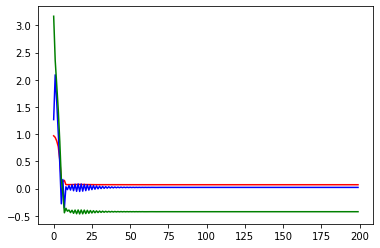

In [32]:
plt.plot(sn_comp.err_updates, 'r')
plt.plot(sn_comp.W_updates, 'b')
plt.plot(sn_comp.B_updates, 'g')
print ('Error   -> Red \nWeights -> Blue \nBias    -> Green')
plt.show()

This is a graph to show how the values of weights and bias change over 200 epochs

As we see, after 10th epoch, we have very little change. It takes 10 epochs for AdaGrad to reach the least error 

### Visualising the change of Weights and Bias on 2D plane

**Setting the error surface**

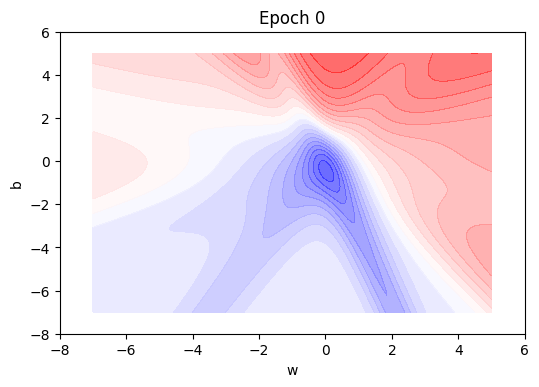

In [33]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)
fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

This is the error surface for this dataset. The red regions represent high loss and blue surface represents low loss <br>
This shows the error of the model when the values of W and b are the respective point on the graph <br>
The value of w = 0.2 and b = -0.5 will have least error in this dataset

**Visualising the way weights and bias are updated**

In [34]:
i = 0
line, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

This is a visualisation of how the AdaGrad algorithm works <br><br>
Points to note - <br>
1) It takes 10 epochs to reach the blue region (i.e. region with low loss) <br>
2) By 30th epoch it has reached the least possible error and stays the same thereafter

### Visualising the change of Weights and Bias on 3D plane

**Setting the Error Surface**

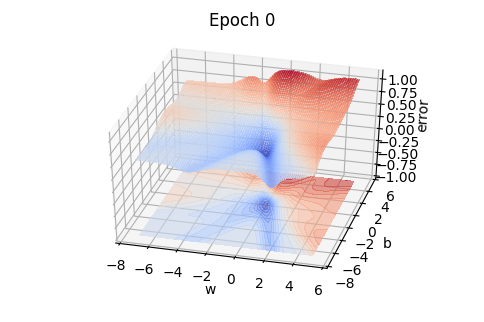

In [35]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
ax.set_zlabel('error')
ax.set_zlim(-1, np.max(Z))
Azim = -75 #@param {type: "slider", min: -90, max: 90}
Elev = 40 #@param {type: "slider", min: 0, max: 90}
ax.view_init (elev=Elev, azim=Azim) # azim = -20
ax.dist=12  
title = ax.set_title('Epoch 0')

As we can see the error surface in 3D, the higher regions are the areas with high error/loss and are red in colour, whereas the lower regions are the regions with lower error/loss and are blue in colour

**Visualising the way weights and bias are updated**

In [36]:
i = 0
line1, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], sn_comp.err_updates[:i+1], color='black', marker='.')
line2, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], np.zeros(i+1) - 1, color='black', marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_3d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

## RMSProp

### Running the Model

In [37]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='RMSProp', epochs=200, learning_rate=5, beta=0.9, print_error=True)

Final Error :  0.11387588554033262


### Plotting the Weights, Bias and Error Values

Error   -> Red 
Weights -> Blue 
Bias    -> Green


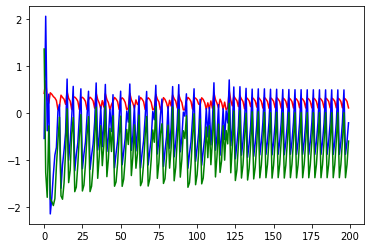

In [38]:
plt.plot(sn_comp.err_updates, 'r')
plt.plot(sn_comp.W_updates, 'b')
plt.plot(sn_comp.B_updates, 'g')
print ('Error   -> Red \nWeights -> Blue \nBias    -> Green')
plt.show()

This is a graph to show how the values of weights and bias change over 200 epochs

As we see, even after 200 epochs, we have lots of fluctuations and the value doesn't come to a minima in 200 epochs at least

### Visualising the change of Weights and Bias on 2D plane

**Setting the error surface**

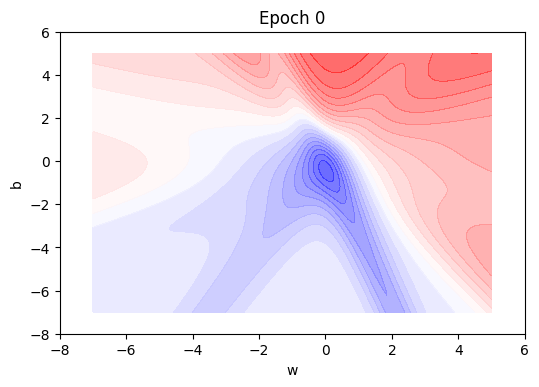

In [39]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)
fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

This is the error surface for this dataset. The red regions represent high loss and blue surface represents low loss <br>
This shows the error of the model when the values of W and b are the point on the graph <br>
The value of w = 0.2 and b = -0.5 will have least error in this dataset

**Visualising the way weights and bias are updated**

In [40]:
i = 0
line, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

This is a visualisation of how the RMSProp algorithm works <br><br>

Points to note - <br>
1) It takes **3** epochs to reach the blue region (i.e. region with low loss) <br>
2) But due to modifications in learning rate and other learning parameters, it causes uncontrolled learning and that causes high fluctuations. Due to this, it never converges and always has high error as compared to other algorithms

### Visualising the change of Weights and Bias on 3D plane

**Setting the Error Surface**

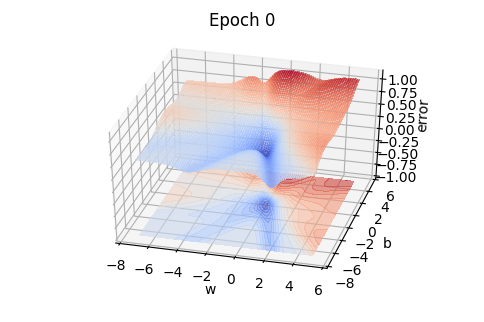

In [41]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
ax.set_zlabel('error')
ax.set_zlim(-1, np.max(Z))
Azim = -75 #@param {type: "slider", min: -90, max: 90}
Elev = 40 #@param {type: "slider", min: 0, max: 90}
ax.view_init (elev=Elev, azim=Azim) # azim = -20
ax.dist=12  
title = ax.set_title('Epoch 0')

As we can see the error surface in 3D, the higher regions are the areas with high error/loss and are red in colour, whereas the lower regions are the regions with lower error/loss and are blue in colour

**Visualising the way weights and bias are updated**

In [42]:
i = 0
line1, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], sn_comp.err_updates[:i+1], color='black', marker='.')
line2, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], np.zeros(i+1) - 1, color='black', marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_3d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

## Adam

### Running the Model

In [43]:
sn_comp = SigmoidNeuron_Compressed(w_init, b_init)
sn_comp.fit(X, Y, optimiser='Adam', epochs=200, learning_rate=5, momentum=0.9, beta=0.9, print_error=True)

Final Error :  0.06990119764419696


### Plotting the Weights, Bias and Error Values

Error   -> Red 
Weights -> Blue 
Bias    -> Green


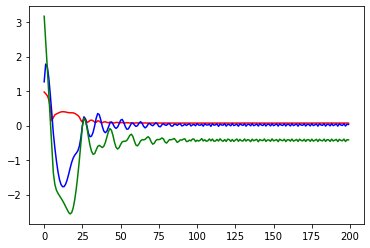

In [44]:
plt.plot(sn_comp.err_updates, 'r')
plt.plot(sn_comp.W_updates, 'b')
plt.plot(sn_comp.B_updates, 'g')
print ('Error   -> Red \nWeights -> Blue \nBias    -> Green')
plt.show()

This is a graph to show how the values of weights and bias change over 200 epochs

As we see, after 100th epoch, we have very little change. It takes 100 epochs for Adam to reach the least error 

### Visualising the change of Weights and Bias on 2D plane

**Setting the error surface**

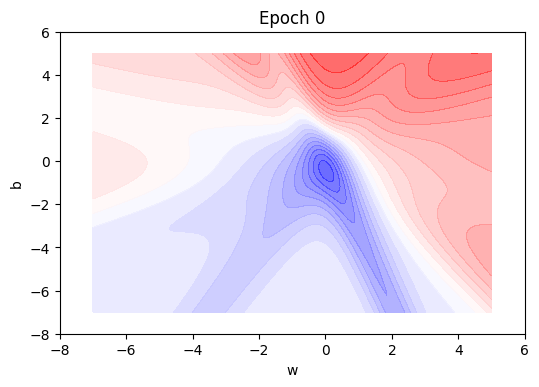

In [45]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)
fig = plt.figure(dpi=100)
ax = plt.subplot(111)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
title = ax.set_title('Epoch 0')
cset = plt.contourf(WW, BB, Z, 25, alpha=0.6, cmap=cm.bwr)
plt.show()

This is the error surface for this dataset. The red regions represent high loss and blue surface represents low loss <br>
This shows the error of the model when the values of W and b are the point on the graph <br>
The value of w = 0.2 and b = -0.5 will have least error in this dataset

**Visualising the way weights and bias are updated**

In [46]:
i = 0
line, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], color='black',marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_2d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

This is a visualisation of how the Adam algorithm works <br><br>
Points to note - <br>
1) It takes **5** epochs to reach the blue region (i.e. region with low loss) <br>
2) By 10th epoch, it overshoots, but very little as compared to momentum <br>
3) By 20th epoch, it reaches back to the minima. By 40th epoch, it has reduced it's fluctuations in that region <br>
4) By 100th epoch, it has reached a low loss and stays that much itself

### Visualising the change of Weights and Bias on 3D plane

**Setting the Error Surface**

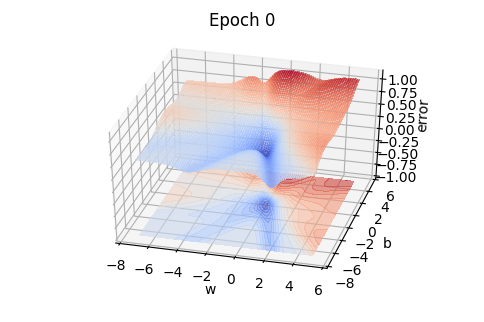

In [47]:
W = np.linspace(w_min, w_max, 256)
b = np.linspace(b_min, b_max, 256)
WW, BB = np.meshgrid(W, b)
Z = sn_comp.error(X, Y, WW, BB)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
ax.set_xlabel('w')
ax.set_xlim(w_min - 1, w_max + 1)
ax.set_ylabel('b')
ax.set_ylim(b_min - 1, b_max + 1)
ax.set_zlabel('error')
ax.set_zlim(-1, np.max(Z))
Azim = -75 #@param {type: "slider", min: -90, max: 90}
Elev = 40 #@param {type: "slider", min: 0, max: 90}
ax.view_init (elev=Elev, azim=Azim) # azim = -20
ax.dist=12  
title = ax.set_title('Epoch 0')

As we can see the error surface in 3D, the higher regions are the areas with high error/loss and are red in colour, whereas the lower regions are the regions with lower error/loss and are blue in colour

**Visualising the way weights and bias are updated**

In [48]:
i = 0
line1, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], sn_comp.err_updates[:i+1], color='black', marker='.')
line2, = ax.plot(sn_comp.W_updates[:i+1], sn_comp.B_updates[:i+1], np.zeros(i+1) - 1, color='black', marker='.')
anim = animation.FuncAnimation(fig, func=plot_animate_3d_comp, frames=animation_frames)
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.